In [1]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import hashlib

In [2]:
file = '03db80f4b2520278a5d31bd138a6e499'
a = np.load(file + '.npz')

X, Y = a['X'], a['Y']

data = pd.DataFrame(X, columns=[i for i in range(X.shape[-1])])
data['Y'] = Y

In [3]:

model = sm.GLM(data['Y'], sm.add_constant(data[[i for i in range(X.shape[-1])]]), family=sm.families.Poisson())

In [4]:
res = model.fit()

In [5]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      Y   No. Observations:               100000
Model:                            GLM   Df Residuals:                    99991
Model Family:                 Poisson   Df Model:                            8
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.1688e+05
Date:                Mon, 14 Oct 2024   Deviance:                       68892.
Time:                        01:25:26   Pearson chi2:                 9.60e+04
No. Iterations:                    22   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.091e-05   6.27e-05     -0.334      0.739      -0.000       0.000
0              0.9341   9.09e-06   1.03e+05      0.000       0.934       0.934
1              0.0945   5.56e-06    1.7e+04      0.000       0.094       0.094
2              0.9454   9.18e-06   1.03e+05      0.000       0.945       0.945
3              0.4296   6.13e-06   7.01e+04      0.000       0.430       0.430
4              0.3955   6.61e-06   5.98e+04      0.000       0.395       0.395
5             -0.5678   7.15e-06  -7.94e+04      0.000      -0.568      -0.568
6              0.9525   5.89e-06   1.62e+05      0.000       0.953       0.953
7             -0.9875   8.98e-06   -1.1e+05      0.000      -0.988      -0.988
==============================================================================
"""

In [6]:
hash_md5 = hashlib.md5()
hash_md5.update(np.array(res.params)[1:].round(1).tobytes())
md5_coefs_hash = hash_md5.hexdigest()
print(md5_coefs_hash)
print(md5_coefs_hash == file)

03db80f4b2520278a5d31bd138a6e499
True


In [7]:
preds = res.predict(sm.add_constant(data[[i for i in range(X.shape[-1])]]))
print(preds.shape)

(100000,)


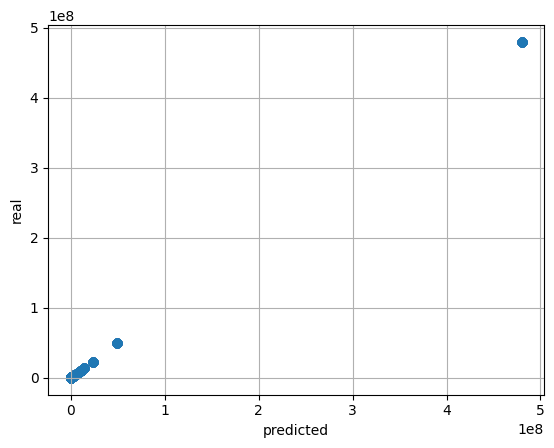

In [8]:
plt.scatter(data['Y'], preds)
plt.ylabel('real')
plt.xlabel('predicted')
plt.grid()